In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#physical_devices
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


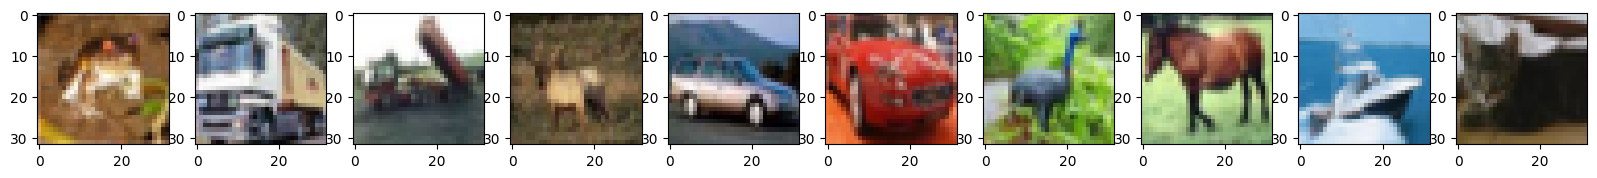

In [ ]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]]))
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 6313994 (24.09 MB)
Trainable params: 6313994 (24.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 145s 92ms/step - loss: 1.9212 - accuracy: 0.3291 - val_loss: 1.7087 - val_accuracy: 0.3997
Epoch 2/10
1563/1563 [==============================] - 166s 107ms/step - loss: 1.6913 - accuracy: 0.3962 - val_loss: 1.6614 - val_accuracy: 0.4133
Epoch 3/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.6179 - accuracy: 0.4264 - val_loss: 1.6291 - val_accuracy: 0.4108
Epoch 4/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.5776 - accuracy: 0.4396 - val_loss: 1.5576 - val_accuracy: 0.4444
Epoch 5/10
1563/1563 [==============================] - 153s 98ms/step - loss: 1.5435 - accuracy: 0.4516 - val_loss: 1.5463 - val_accuracy: 0.4499
Epoch 6/10
1563/1563 [==============================] - 161s 103ms/step - loss: 1.5172 - accuracy: 0.4606 - val_loss: 1.6560 - val_accuracy: 0.4177
Epoch 7/10
1563/1563 [==============================] - 155s 99ms/step - loss: 1.5000 - accuracy: 0.4678 - val_loss

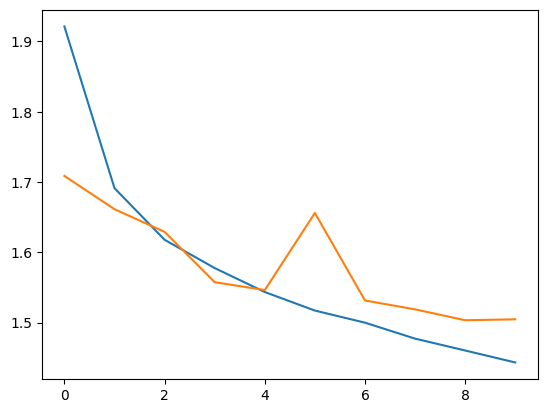

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)        

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 181s 115ms/step - loss: 1.5858 - accuracy: 0.4152 - val_loss: 1.2052 - val_accuracy: 0.5696
Epoch 2/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.1420 - accuracy: 0.5988 - val_loss: 0.9933 - val_accuracy: 0.6484
Epoch 3/10
1563/1563 [==============================] - 181s 116ms/step - loss: 0.9505 - accuracy: 0.6692 - val_loss: 0.8834 - val_accuracy: 0.6928
Epoch 4/10
1563/1563 [==============================] - 179s 114ms/step - loss: 0.8086 - accuracy: 0.7235 - val_loss: 0.8004 - val_accuracy: 0.7235
Epoch 5/10
1563/1563 [==============================] - 179s 114ms/step - loss: 0.7122 - accuracy: 0.7564 - val_loss: 0.8187 - val_accuracy: 0.7204
Epoch 6/10
1563/1563 [==============================] - 179s 115ms/step - loss: 0.6244 - accuracy: 0.7841 - val_loss: 0.8194 - val_accuracy: 0.7267
Epoch 7/10
1563/1563 [==============================] - 179s 114ms/step - loss: 0.5553 - accuracy: 0.8085 - val_

In [ ]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

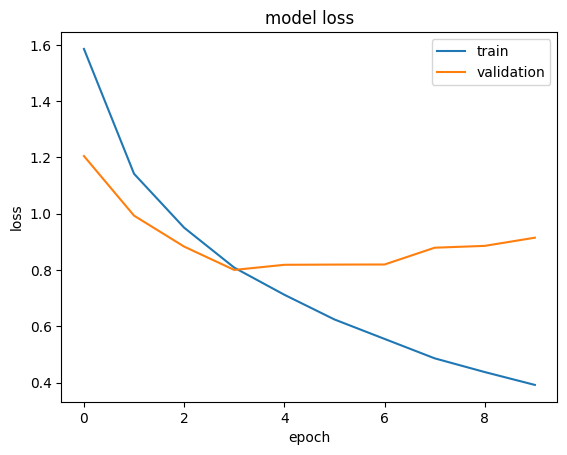

In [ ]:
plotLosses(history)

In [ ]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

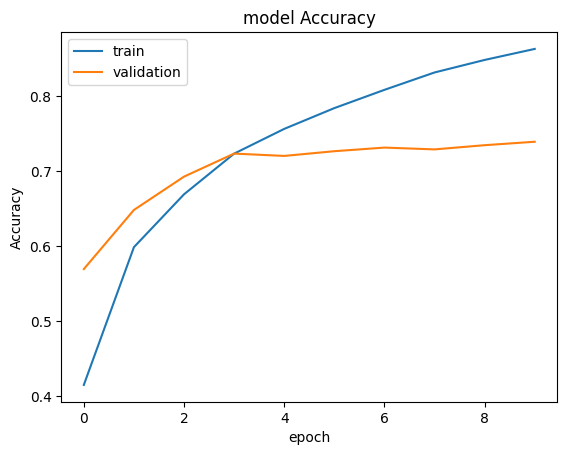

In [ ]:
plotAccuracy(history)

In [ ]:
predictions = cnn.predict([X_test])
print(predictions)


313/313 [==============================] - 14s 44ms/step
[[4.6380619e-03 2.1108573e-03 2.3474153e-03 ... 3.5107890e-03
  6.9955379e-02 3.8363305e-03]
 [2.1817345e-06 7.6736151e-06 1.5801461e-11 ... 1.7346938e-14
  9.9999005e-01 2.4936774e-08]
 [8.6317986e-01 2.0994041e-03 1.5243208e-03 ... 1.3602881e-02
  9.2151351e-02 2.0132264e-02]
 ...
 [5.6729912e-11 9.0603779e-16 3.8834214e-06 ... 2.3908813e-05
  2.4729229e-13 1.0403192e-13]
 [1.6388904e-02 6.7928217e-05 1.5473485e-01 ... 1.9135265e-01
  2.5691473e-04 1.5806877e-04]
 [2.3833220e-16 1.8635821e-24 2.7368295e-14 ... 9.9999994e-01
  2.6821384e-22 3.3234070e-19]]


Corresponding classes for the labels: ['airplane']


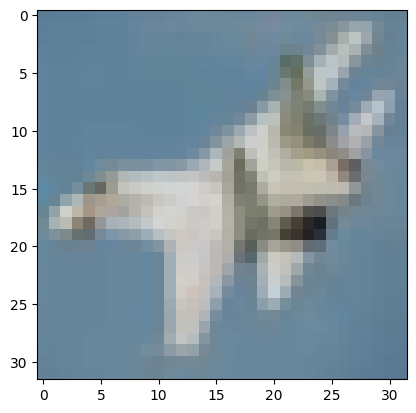

In [ ]:
plt.imshow(X_test[10])
import numpy as np
print('Corresponding classes for the labels: ' + str([cifar10_classes[np.argmax(predictions[10])]]))

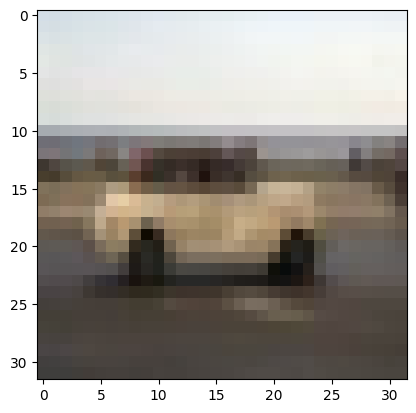

In [ ]:
plt.imshow(X_test[201])

In [ ]:
print('Corresponding classes for the labels: ' + str([cifar10_classes[np.argmax(predictions[201])]]))

Corresponding classes for the labels: ['automobile']
